<a href="https://colab.research.google.com/github/AhmadAlAshery/Tensorflow/blob/main/fuzzy%20time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import zipfile;

In [2]:
pip install -U pyFTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.5 MB/s 


In [3]:
import zipfile
with zipfile.ZipFile("drive-download-20220917T132632Z-001.zip","r") as zip_ref:
    zip_ref.extractall()

In [4]:
# load datasets into dataframs
genting_1 = pd.read_csv('1 Singapore Genting G13.SI.csv', parse_dates=['Date'])
airline_2 = pd.read_csv('2 Singapore Airlines C6L.SI.csv', parse_dates=['Date'])
jardine_3 = pd.read_csv('3 Jardine Cycle _ Carriage Limited  C07.SI.csv', parse_dates=['Date'])
cortina_4 = pd.read_csv('4 Cortina Holdings Limited C41.SI.csv', parse_dates=['Date'])
fux_5 = pd.read_csv('5 Fuxing China Group Limited AWK.SI.csv', parse_dates=['Date'])
health_6 = pd.read_csv('6 HealthBank Holdings Limited  40B.SI.csv', parse_dates=['Date'])
mem_7 = pd.read_csv('7 Memories Group Limited 1H4.SI.csv', parse_dates=['Date'])
park_8 = pd.read_csv('8 Parkson Retail Asia Limited O9E.SI.csv', parse_dates=['Date'])
pav_9 = pd.read_csv('9 Pavillon Holdings Ltd 596.SI.csv', parse_dates=['Date'])
uni_10 = pd.read_csv('10 Uni-Asia Group Limited CHJ.SI.csv', parse_dates=['Date'])

In [111]:
data = {0:genting_1,
        1:airline_2,
        2:jardine_3,
        3:cortina_4,
        4:fux_5,
        5:health_6,
        6:mem_7,
        7:park_8,
        8:pav_9,
        9:uni_10}

data_names = {0:'Singapore Genting G13.SI',
        1:'Singapore Airlines C6L.SI',
        2:'Jardine Cycle & Carriage Limited  C07.SI',
        3:'Cortina Holdings Limited C41.SI',
        4:'Fuxing China Group Limited AWK.SI',
        5:'HealthBank Holdings Limited  40B.SI',
        6:'Memories Group Limited 1H4.SI',
        7:'Parkson Retail Asia Limited O9E.SI',
        8:'Pavillon Holdings Ltd 596.SI',
        9:'Uni-Asia Group Limited CHJ.SI'}

In [6]:
for i in range(10):
    data[i].dropna(inplace=True)

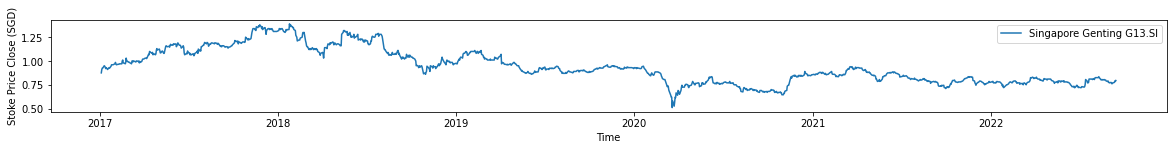

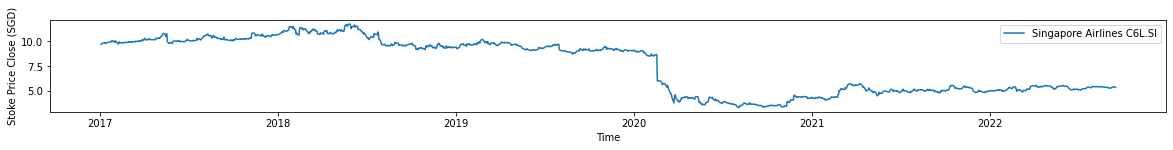

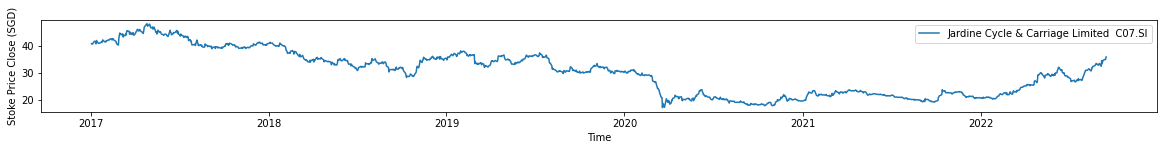

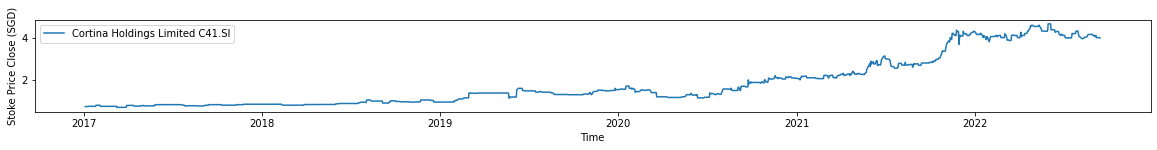

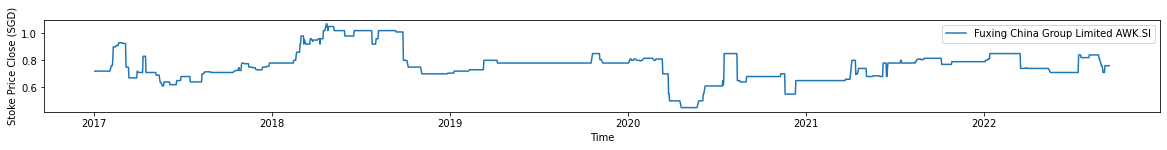

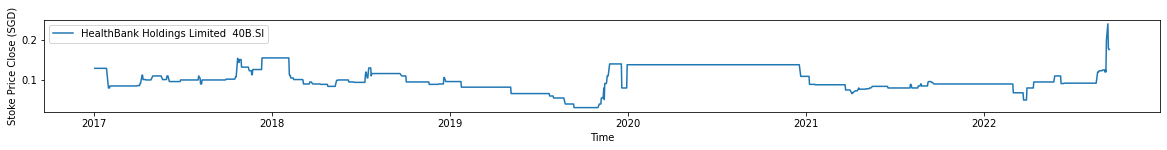

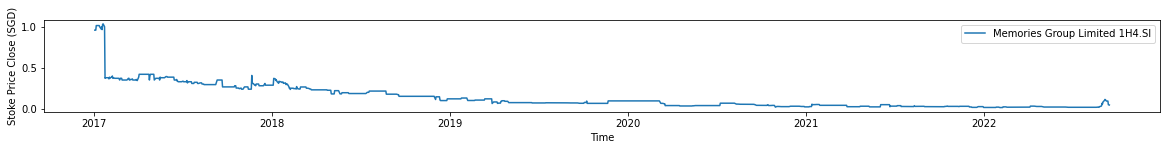

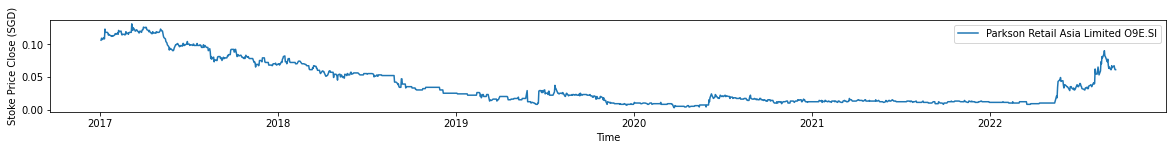

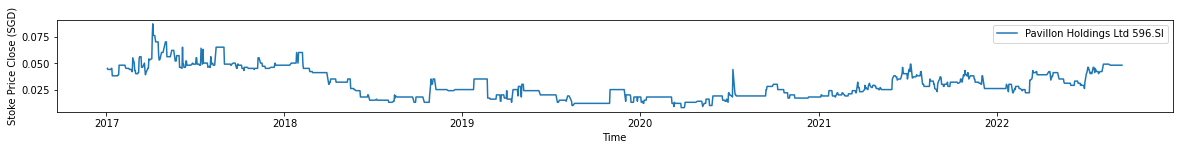

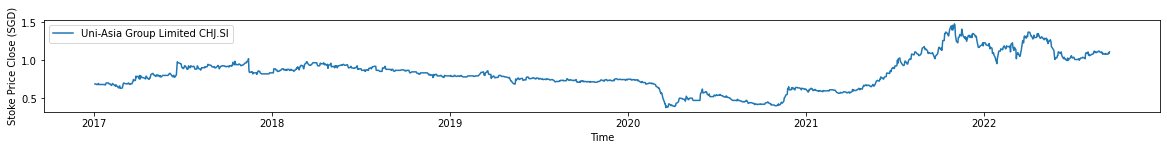

In [7]:
for i in range(10):
    plt.figure(figsize=(20,20))
    plt.subplot(10,1,i+1)
    plt.plot(data[i]["Date"], data[i]['Close'], label=data_names[i])
    plt.xlabel('Time')
    plt.ylabel("Stoke Price Close (SGD)")
    plt.legend()
    plt.show()

In [11]:
data_len = len(data[0])
train_len = int(np.ceil(data_len*0.8)) 
test_len = data_len - train_len
data_len, train_len, test_len

(1435, 1148, 287)

In [100]:
data[0]["Close"].values.reshape(-1,1)

array([[0.875],
       [0.91 ],
       [0.925],
       ...,
       [0.79 ],
       [0.785],
       [0.795]])

In [109]:
d = []

In [112]:

for i in range(10):
    d.append(data[i]["Close"].values.reshape(-1,1))

In [119]:
train= []
test = []

In [120]:
for i in range(10):
    train.append(d[i][:train_len])
    test.append(d[i][-test_len:])

In [124]:
train[0].shape, test[0].shape

((1148, 1), (287, 1))

In [128]:
train = np.array(train)
test = np.array(test)

In [129]:
train.shape, test.shape

((10, 1148, 1), (10, 287, 1))

In [133]:
from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

In [160]:
dataset_diff = []
for i in range(10):
    dataset_diff.append(np.array(tdiff.apply(list(train[i]))).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


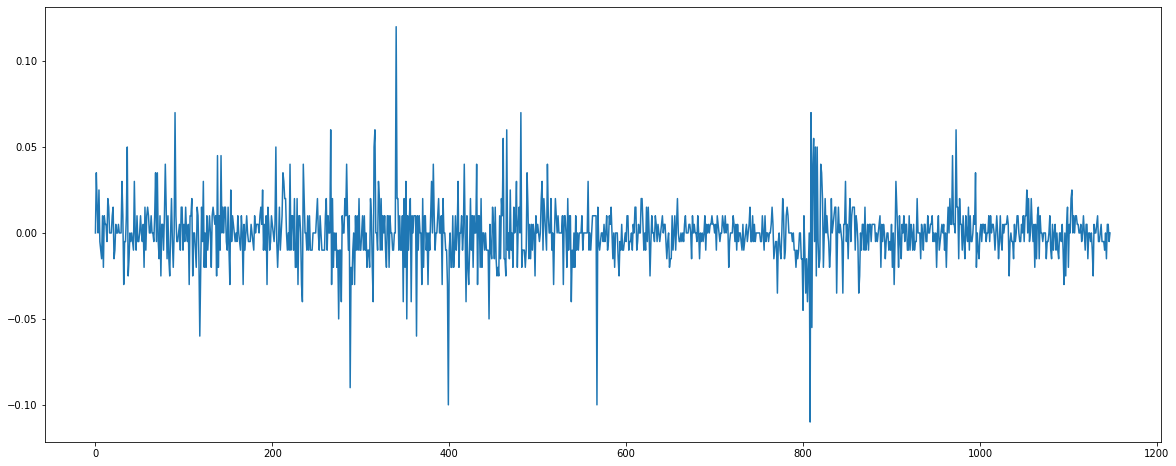

In [167]:
plt.figure(figsize=(20,8))
plt.plot(range(1148), dataset_diff[0])

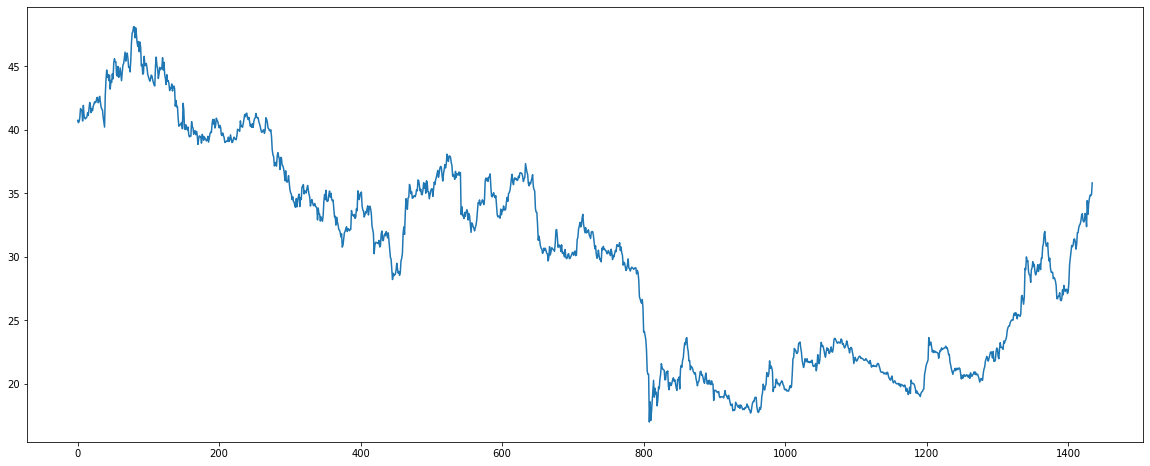

In [168]:
plt.figure(figsize=(20,8))
plt.plot(range(1435), d[2])

In [193]:
from pyFTS.partitioners import Grid, Entropy, Util as pUtil
fs = Grid.GridPartitioner(data=train[0], npart=20)
print(fs)

Grid:
A0: trimf([0.4055, 0.459, 0.5125])
A1: trimf([0.45899999999999996, 0.5125, 0.566])
A2: trimf([0.5124999999999998, 0.5659999999999998, 0.6194999999999998])
A3: trimf([0.5659999999999998, 0.6194999999999998, 0.6729999999999998])
A4: trimf([0.6194999999999998, 0.6729999999999998, 0.7264999999999998])
A5: trimf([0.6729999999999997, 0.7264999999999997, 0.7799999999999997])
A6: trimf([0.7264999999999996, 0.7799999999999996, 0.8334999999999996])
A7: trimf([0.7799999999999996, 0.8334999999999996, 0.8869999999999996])
A8: trimf([0.8334999999999996, 0.8869999999999996, 0.9404999999999996])
A9: trimf([0.8869999999999995, 0.9404999999999994, 0.9939999999999994])
A10: trimf([0.9404999999999993, 0.9939999999999993, 1.0474999999999994])
A11: trimf([0.9939999999999994, 1.0474999999999994, 1.1009999999999995])
A12: trimf([1.0474999999999994, 1.1009999999999993, 1.1544999999999992])
A13: trimf([1.100999999999999, 1.1544999999999992, 1.2079999999999993])
A14: trimf([1.1544999999999992, 1.2079999999

In [195]:
from pyFTS.models import chen
model = chen.ConventionalFTS(partitioner=fs)
model.fit(train[0])
print(model)

Conventional FTS:
A1 -> A2
A2 -> A1,A3
A3 -> A1,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6,A7
A7 -> A6,A7,A8
A8 -> A7,A8,A9
A9 -> A10,A8,A9
A10 -> A10,A11,A9
A11 -> A10,A11,A12
A12 -> A11,A12,A13
A13 -> A12,A13,A14,A15
A14 -> A13,A14,A15
A15 -> A14,A15,A16
A16 -> A14,A15,A16,A17
A17 -> A16,A17



In [196]:
forecasts = model.predict(test[0])

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


In [197]:
forecasts = np.array(forecasts).reshape(-1,1)

In [198]:
x = []
arr=np.full((1148,1),np.nan)
x.append(np.concatenate((arr, forecasts), axis=0).reshape(-1,1))

In [199]:
x = np.array(x).reshape(-1,1)

In [200]:
x.shape

(1435, 1)

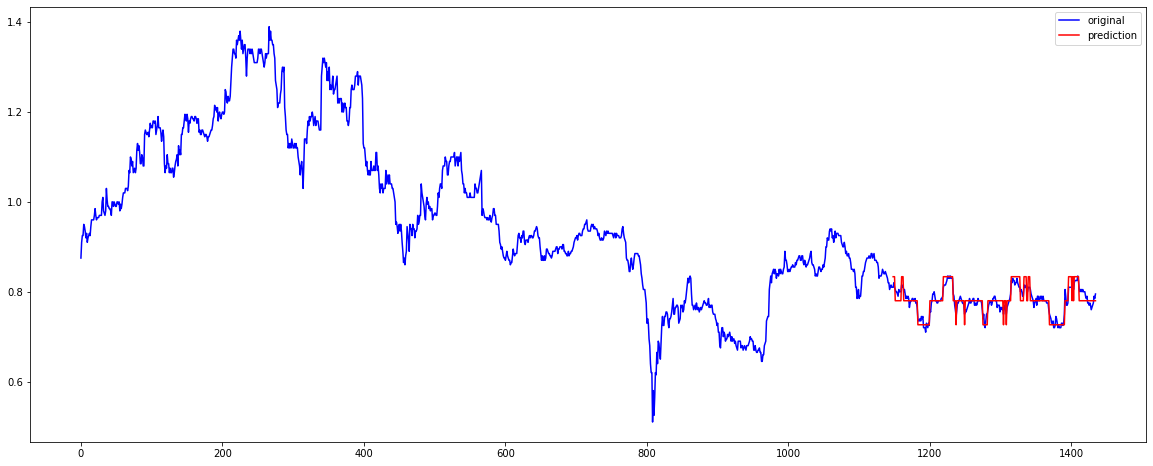

In [201]:
plt.figure(figsize=(20,8))
plt.plot(range(1435), d[0],color='b', label='original')
plt.plot(range(1435), x, color='r', label='prediction')
plt.legend()